In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")
penguins = sns.load_dataset("penguins")
diamonds = sns.load_dataset("diamonds")
exercise = sns.load_dataset("exercise")
titanic  = sns.load_dataset("titanic")

# Parte 1 punto 6

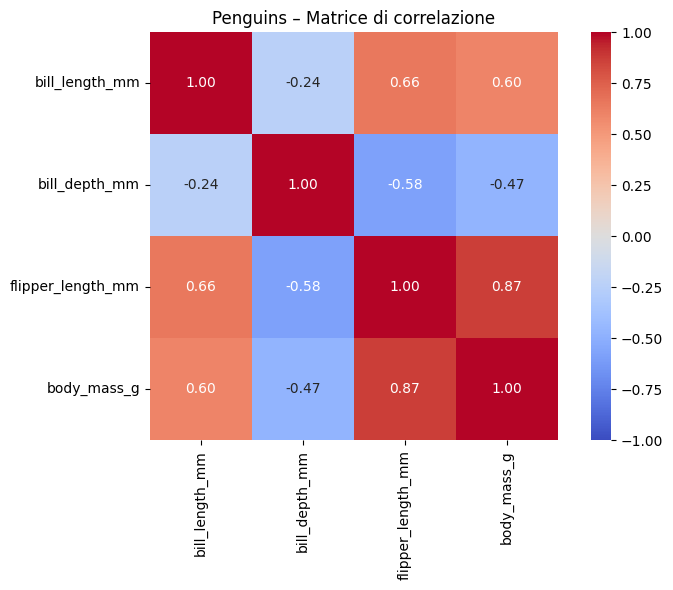

In [9]:
# Seleziona solo le variabili numeriche
num_vars = penguins.select_dtypes(include="number")
corr = num_vars.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,         
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True
)
plt.title("Penguins – Matrice di correlazione")
plt.tight_layout()
plt.show()


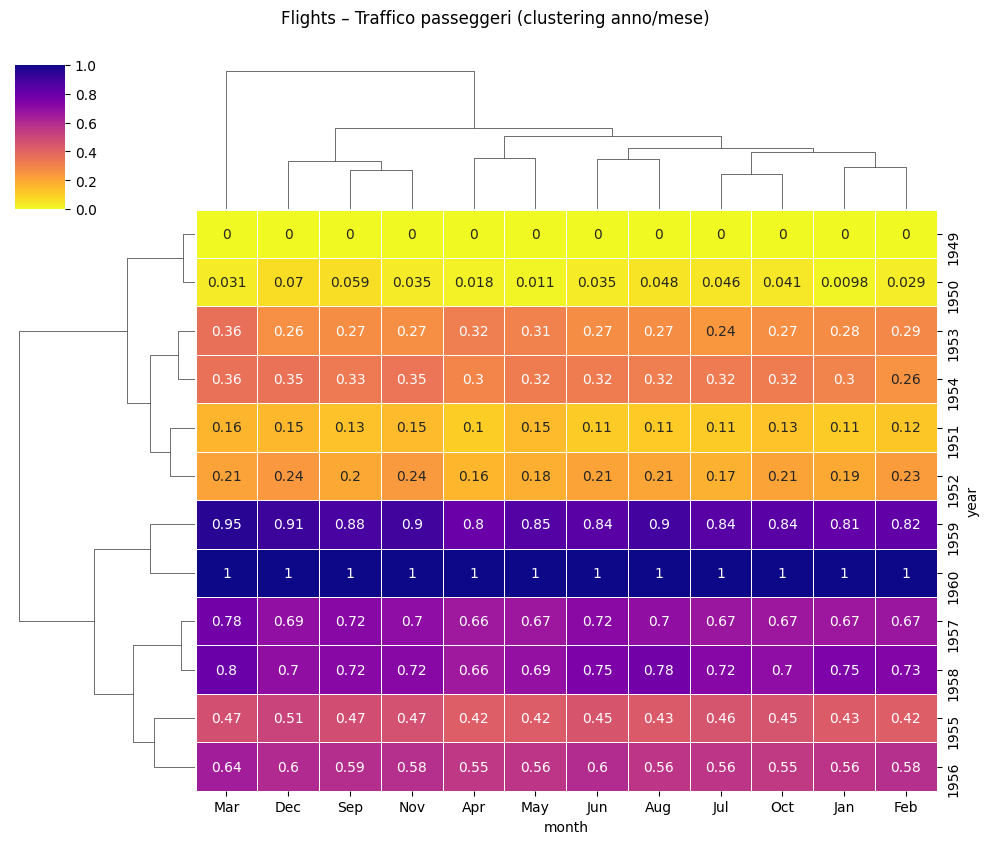

In [10]:
# Trasforma il DataFrame in matrice Year × Month
flight_matrix = flights.pivot(index="year", columns="month", values="passengers")
g = sns.clustermap(
    flight_matrix,
    annot = True,
    cmap="plasma_r",    
    standard_scale=1,     
    linewidths=.5,
    figsize=(10, 8)
)

g.figure.suptitle("Flights – Traffico passeggeri (clustering anno/mese)", y=1.05)
plt.show()

# Parte 2 punto 6

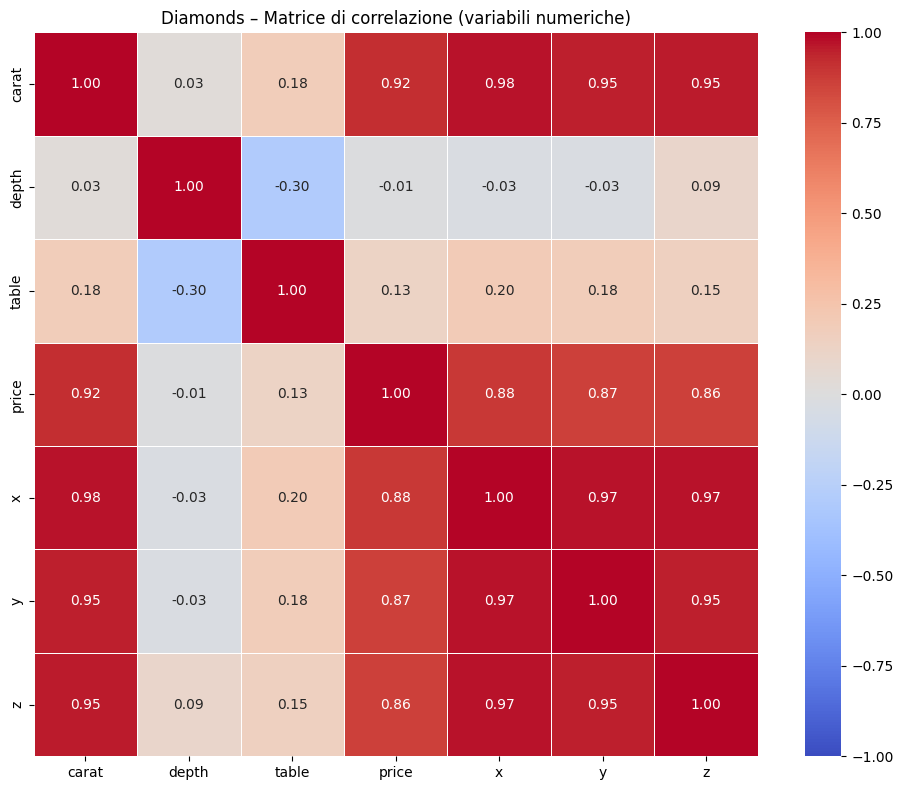

In [11]:
# 2.1 – seleziona solo le variabili numeriche
num_diamonds = diamonds.select_dtypes(include="number")

# 2.2 – calcola la matrice di correlazione
corr_diamonds = num_diamonds.corr()

# 2.3 – visualizza la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_diamonds,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True,
    linewidths=.5
)
plt.title("Diamonds – Matrice di correlazione (variabili numeriche)")
plt.tight_layout()
plt.show()

In [ ]:
titanic.head()

# --- 2. Tieni solo le colonne numeriche ---
num_titanic = titanic.select_dtypes(include="number")

# --- 3. Gestisci i NaN (media di colonna) ---
num_titanic = num_titanic.fillna(num_titanic.mean(numeric_only=True))

# --- 4. Elimina colonne con varianza nulla (std = 0) ---
std = num_titanic.std()
num_titanic = num_titanic.loc[:, std > 0]

# --- 5. Normalizza con z‑score SENZA scikit‑learn ---
norm_df = (num_titanic - num_titanic.mean()) / num_titanic.std()
# Se preferisci [0,1] usa: norm_df = (num_titanic - num_titanic.min()) / (num_titanic.max() - num_titanic.min())

# --- 6. Clustermap ---
g = sns.clustermap(
    norm_df,
    cmap="viridis",
    linewidths=0.2,
    figsize=(12, 10),
    vmin=-3, vmax=3     # limita la scala colore → evita "bianco"
)

g.figure.suptitle("Titanic – Clustermap (numeriche normalizzate)", y=1.03)
plt.show()


ModuleNotFoundError: No module named 'sklearn'